In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
directory=os.getcwd().replace('notebooks','data\\processed\\')
# output_directory=directory.replace('\\output\\census_elections\\','\\processed\\')
main_df=pd.read_csv(f'{directory}main_df.csv')
main_df['ethnic_percent_black2']=main_df['ethnic_percent_black']*100
main_df

,Electoral_District_Number,District_Name_x,Province,2015_Bloc-Québécois_Votes,2015_Conservative_Votes,2015_Green-Party_Votes,2015_Liberal_Votes,2015_NDP-New-Democratic-Party_Votes,2015_Other_Votes,2015_Vote_Total,2015_Position_1,2015_Position_2,2015_Position_3,2015_Position_4,2015_Position_5,2015_Position_6,2015_Number_of_Polling_Stations,2015_Number_of_Electors,2015_Bloc-Québécois,2015_Conservative,2015_Green-Party,2015_Liberal,2015_NDP-New-Democratic-Party,2015_Other,2015_Percent_Riding_Votes_Liberal,2015_Percent_Riding_Votes_Bloc-Québécois,2015_Percent_Riding_Votes_Conservative,2015_Percent_Riding_Votes_Green-Party,2015_Percent_Riding_Votes_NDP-New-Democratic-Party,2015_Percent_Riding_Votes_Other,2015_Voter_Participation,2019_Bloc-Québécois_Votes,2019_Conservative_Votes,2019_Green-Party_Votes,2019_Liberal_Votes,2019_NDP-New-Democratic-Party_Votes,2019_Other_Votes,2019_Vote_Total,2019_Position_1,2019_Position_2,2019_Position_3,2019_Position_4,2019_Position_5,2019_Position_6,2019_Number_of_Polling_Stations,2019_Number_of_Electors,2019_Bloc-Québécois,2019_Conservative,2019_Green-Party,2019_Liberal,2019_NDP-New-Democratic-Party,2019_Other,2019_Percent_Riding_Votes_Liberal,2019_Percent_Riding_Votes_Bloc-Québécois,2019_Percent_Riding_Votes_Conservative,2019_Percent_Riding_Votes_Green-Party,2019_Percent_Riding_Votes_NDP-New-Democratic-Party,2019_Percent_Riding_Votes_Other,2019_Voter_Participation,2015-2019_Absolute_Change_Bloc-Québécois_Votes,2015-2019_EOE_Percent_Change_Bloc-Québécois_Votes,2015-2019_Absolute_Change_Conservative_Votes,2015-2019_EOE_Percent_Change_Conservative_Votes,2015-2019_Absolute_Change_Green-Party_Votes,2015-2019_EOE_Percent_Change_Green-Party_Votes,2015-2019_Absolute_Change_Liberal_Votes,2015-2019_EOE_Percent_Change_Liberal_Votes,2015-2019_Absolute_Change_NDP-New-Democratic-Party_Votes,2015-2019_EOE_Percent_Change_NDP-New-Democratic-Party_Votes,2015-2019_Absolute_Change_Other_Votes,2015-2019_EOE_Percent_Change_Other_Votes,2015-2019_Absolute_Change_Vote_Total,2015-2019_EOE_Percent_Change_Vote_Total,2015-2019_Absolute_Change_Number_of_Polling_Stations,2015-2019_EOE_Percent_Change_Number_of_Polling_Stations,2015-2019_Absolute_Change_Number_of_Electors,2015-2019_EOE_Percent_Change_Number_of_Electors,2015-2019_Absolute_Change_Bloc-Québécois,2015-2019_EOE_Percent_Change_Bloc-Québécois,2015-2019_Absolute_Change_Conservative,2015-2019_EOE_Percent_Change_Conservative,2015-2019_Absolute_Change_Green-Party,2015-2019_EOE_Percent_Change_Green-Party,2015-2019_Absolute_Change_Liberal,2015-2019_EOE_Percent_Change_Liberal,2015-2019_Absolute_Change_NDP-New-Democratic-Party,2015-2019_EOE_Percent_Change_NDP-New-Democratic-Party,2015-2019_Absolute_Change_Other,2015-2019_EOE_Percent_Change_Other,2015-2019_Absolute_Change_Percent_Riding_Votes_Liberal,2015-2019_EOE_Percent_Change_Percent_Riding_Votes_Liberal,2015-2019_Absolute_Change_Percent_Riding_Votes_Bloc-Québécois,2015-2019_EOE_Percent_Change_Percent_Riding_Votes_Bloc-Québécois,2015-2019_Absolute_Change_Percent_Riding_Votes_Conservative,2015-2019_EOE_Percent_Change_Percent_Riding_Votes_Conservative,2015-2019_Absolute_Change_Percent_Riding_Votes_Green-Party,2015-2019_EOE_Percent_Change_Percent_Riding_Votes_Green-Party,2015-2019_Absolute_Change_Percent_Riding_Votes_NDP-New-Democratic-Party,2015-2019_EOE_Percent_Change_Percent_Riding_Votes_NDP-New-Democratic-Party,2015-2019_Absolute_Change_Percent_Riding_Votes_Other,2015-2019_EOE_Percent_Change_Percent_Riding_Votes_Other,2015-2019_Absolute_Change_Voter_Participation,2015-2019_EOE_Percent_Change_Voter_Participation,employment_type_percent_0_management_occupations,employment_type_percent_1_business_finance_and_administration_occupations,employment_type_percent_2_natural_and_applied_sciences_and_related_occupations,employment_type_percent_3_health_occupations,employment_type_percent_4_occupations_in_education_law_and_social_community_and_government_services,employment_type_percent_5_occupations_in_art_culture_recreation_and_sport,e

In [61]:
def conditions(x):
    if x == 0.0:
        return "Large Black Immigrant Suburban"
    elif x == 1.0:
        return "Medium Black Suburban"
    elif x == 2.0:
        return "Medium Black Urban (Downtown)"
    elif x == 3.0:
        return "Medium Black Exurban"
    elif x == 4.0:
        return "Medium Black Urban (Downtown Outskirts)"
    else:
        return "Rest of Canada"

func = np.vectorize(conditions)
segments = func(main_df["cluster"])
main_df['segments']=segments

In [62]:
main_df['segments'].value_counts()

Rest of Canada                             258
Medium Black Suburban                       43
Large Black Immigrant Suburban              17
Medium Black Urban (Downtown Outskirts)     11
Medium Black Exurban                         5
Medium Black Urban (Downtown)                4
Name: segments, dtype: int64

In [60]:
main_df[main_df.cluster==4]['ethnic_percent_black']

84     0.084093
116    0.065754
127    0.064106
128    0.093007
133    0.054948
136    0.058808
137    0.049598
190    0.052844
199    0.051456
207    0.111824
218    0.049528
Name: ethnic_percent_black, dtype: float64

In [54]:
main_df[main_df.cluster==1]['2019_Position_1'].value_counts()	#['ethnic_percent_black']

Liberal                     33
NDP-New-Democratic-Party     4
Bloc-Québécois               4
Conservative                 2
Name: 2019_Position_1, dtype: int64

In [63]:
main_df[main_df.cluster==0]

,Electoral_District_Number,District_Name_x,Province,2015_Bloc-Québécois_Votes,2015_Conservative_Votes,2015_Green-Party_Votes,2015_Liberal_Votes,2015_NDP-New-Democratic-Party_Votes,2015_Other_Votes,2015_Vote_Total,2015_Position_1,2015_Position_2,2015_Position_3,2015_Position_4,2015_Position_5,2015_Position_6,2015_Number_of_Polling_Stations,2015_Number_of_Electors,2015_Bloc-Québécois,2015_Conservative,2015_Green-Party,2015_Liberal,2015_NDP-New-Democratic-Party,2015_Other,2015_Percent_Riding_Votes_Liberal,2015_Percent_Riding_Votes_Bloc-Québécois,2015_Percent_Riding_Votes_Conservative,2015_Percent_Riding_Votes_Green-Party,2015_Percent_Riding_Votes_NDP-New-Democratic-Party,2015_Percent_Riding_Votes_Other,2015_Voter_Participation,2019_Bloc-Québécois_Votes,2019_Conservative_Votes,2019_Green-Party_Votes,2019_Liberal_Votes,2019_NDP-New-Democratic-Party_Votes,2019_Other_Votes,2019_Vote_Total,2019_Position_1,2019_Position_2,2019_Position_3,2019_Position_4,2019_Position_5,2019_Position_6,2019_Number_of_Polling_Stations,2019_Number_of_Electors,2019_Bloc-Québécois,2019_Conservative,2019_Green-Party,2019_Liberal,2019_NDP-New-Democratic-Party,2019_Other,2019_Percent_Riding_Votes_Liberal,2019_Percent_Riding_Votes_Bloc-Québécois,2019_Percent_Riding_Votes_Conservative,2019_Percent_Riding_Votes_Green-Party,2019_Percent_Riding_Votes_NDP-New-Democratic-Party,2019_Percent_Riding_Votes_Other,2019_Voter_Participation,2015-2019_Absolute_Change_Bloc-Québécois_Votes,2015-2019_EOE_Percent_Change_Bloc-Québécois_Votes,2015-2019_Absolute_Change_Conservative_Votes,2015-2019_EOE_Percent_Change_Conservative_Votes,2015-2019_Absolute_Change_Green-Party_Votes,2015-2019_EOE_Percent_Change_Green-Party_Votes,2015-2019_Absolute_Change_Liberal_Votes,2015-2019_EOE_Percent_Change_Liberal_Votes,2015-2019_Absolute_Change_NDP-New-Democratic-Party_Votes,2015-2019_EOE_Percent_Change_NDP-New-Democratic-Party_Votes,2015-2019_Absolute_Change_Other_Votes,2015-2019_EOE_Percent_Change_Other_Votes,2015-2019_Absolute_Change_Vote_Total,2015-2019_EOE_Percent_Change_Vote_Total,2015-2019_Absolute_Change_Number_of_Polling_Stations,2015-2019_EOE_Percent_Change_Number_of_Polling_Stations,2015-2019_Absolute_Change_Number_of_Electors,2015-2019_EOE_Percent_Change_Number_of_Electors,2015-2019_Absolute_Change_Bloc-Québécois,2015-2019_EOE_Percent_Change_Bloc-Québécois,2015-2019_Absolute_Change_Conservative,2015-2019_EOE_Percent_Change_Conservative,2015-2019_Absolute_Change_Green-Party,2015-2019_EOE_Percent_Change_Green-Party,2015-2019_Absolute_Change_Liberal,2015-2019_EOE_Percent_Change_Liberal,2015-2019_Absolute_Change_NDP-New-Democratic-Party,2015-2019_EOE_Percent_Change_NDP-New-Democratic-Party,2015-2019_Absolute_Change_Other,2015-2019_EOE_Percent_Change_Other,2015-2019_Absolute_Change_Percent_Riding_Votes_Liberal,2015-2019_EOE_Percent_Change_Percent_Riding_Votes_Liberal,2015-2019_Absolute_Change_Percent_Riding_Votes_Bloc-Québécois,2015-2019_EOE_Percent_Change_Percent_Riding_Votes_Bloc-Québécois,2015-2019_Absolute_Change_Percent_Riding_Votes_Conservative,2015-2019_EOE_Percent_Change_Percent_Riding_Votes_Conservative,2015-2019_Absolute_Change_Percent_Riding_Votes_Green-Party,2015-2019_EOE_Percent_Change_Percent_Riding_Votes_Green-Party,2015-2019_Absolute_Change_Percent_Riding_Votes_NDP-New-Democratic-Party,2015-2019_EOE_Percent_Change_Percent_Riding_Votes_NDP-New-Democratic-Party,2015-2019_Absolute_Change_Percent_Riding_Votes_Other,2015-2019_EOE_Percent_Change_Percent_Riding_Votes_Other,2015-2019_Absolute_Change_Voter_Participation,2015-2019_EOE_Percent_Change_Voter_Participation,employment_type_percent_0_management_occupations,employment_type_percent_1_business_finance_and_administration_occupations,employment_type_percent_2_natural_and_applied_sciences_and_related_occupations,employment_type_percent_3_health_occupations,employment_type_percent_4_occupations_in_education_law_and_social_community_and_government_services,employment_type_percent_5_occupations_in_art_culture_recreation_and_sport,e

In [67]:
main_df['age_percent_between_15_and_29_years'] = main_df.age_percent_15_to_19_years + main_df.age_percent_20_to_24_years + main_df.age_percent_25_to_29_years 
main_df['black_youth'] = (main_df['age_percent_between_15_and_29_years'] * main_df['ethnic_black']).astype(int)

In [70]:
main_df.groupby('segments')['black_youth'].sum()

segments
Large Black Immigrant Suburban             62633
Medium Black Exurban                        9643
Medium Black Suburban                      64403
Medium Black Urban (Downtown Outskirts)    14676
Medium Black Urban (Downtown)               8224
Rest of Canada                             78658
Name: black_youth, dtype: int32

In [4]:
pd.options.display.max_columns = None

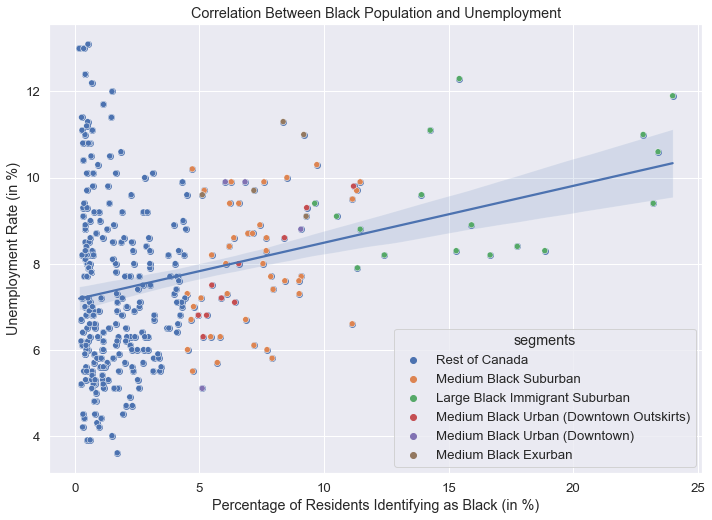

In [71]:
# sns.scatterplot(x="ethnic_percent_black", y="employment_unemployment_rate", data=main_df,hue='cluster')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="whitegrid")
sns.set(font_scale=1.2)
scatter_df=main_df[main_df.employment_unemployment_rate<=13.5]
sns.regplot(x="ethnic_percent_black2", y="employment_unemployment_rate", data=scatter_df)#,hue='cluster')
ax=sns.scatterplot(x="ethnic_percent_black2", y="employment_unemployment_rate", data=scatter_df ,hue='segments')#hue='cluster')
ax.set(xlabel='Percentage of Residents Identifying as Black (in %)', ylabel='Unemployment Rate (in %)',title='Correlation Between Black Population and Unemployment')
plt.show()

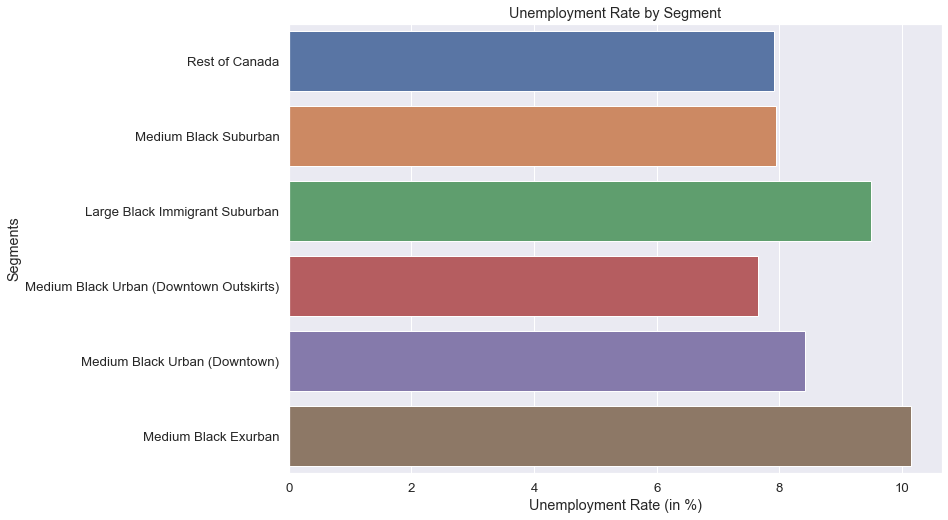

In [76]:
# sns.scatterplot(x="ethnic_percent_black", y="employment_unemployment_rate", data=main_df,hue='cluster')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(style="whitegrid")
sns.set(font_scale=1.2)
main_df['education_subject_percent_business_management_and_public_administration2']=main_df['education_subject_percent_business_management_and_public_administration']*100
scatter_df=main_df[main_df.employment_unemployment_rate<=13.5]
# sns.regplot(x="immigrant_category_percent_immigrants", y="employment_unemployment_rate", data=scatter_df)#,hue='cluster')
ax=sns.barplot(y='segments',x= 'employment_unemployment_rate', data=main_df, ci=False)
ax.set(ylabel='Segments', xlabel='Unemployment Rate (in %)',title='Unemployment Rate by Segment')

plt.show()

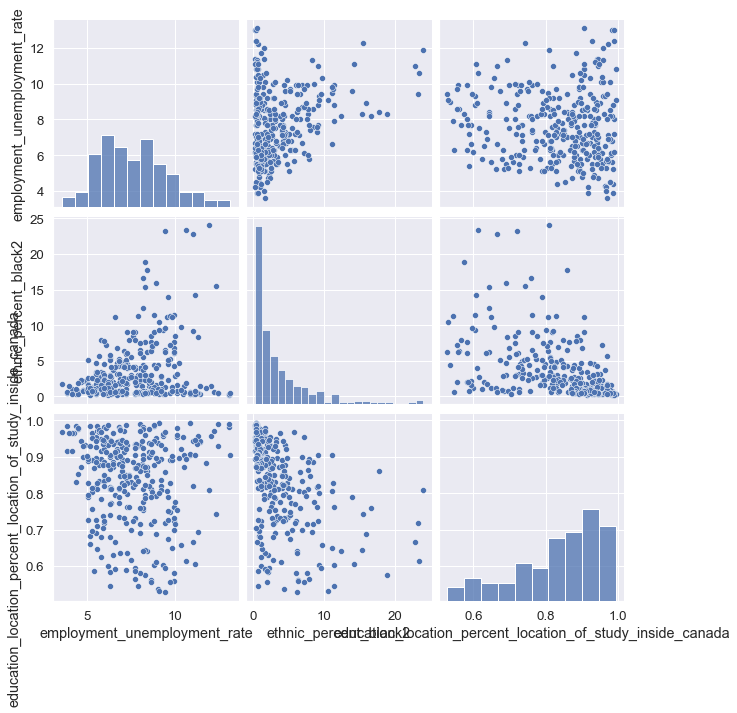

In [44]:
sns.pairplot(scatter_df[["employment_unemployment_rate","ethnic_percent_black2","education_location_percent_location_of_study_inside_canada"]], height=3)

In [19]:
main_df[main_df.employment_unemployment_rate>=13.5]

,Electoral_District_Number,District_Name_x,Province,2015_Bloc-Québécois_Votes,2015_Conservative_Votes,2015_Green-Party_Votes,2015_Liberal_Votes,2015_NDP-New-Democratic-Party_Votes,2015_Other_Votes,2015_Vote_Total,2015_Position_1,2015_Position_2,2015_Position_3,2015_Position_4,2015_Position_5,2015_Position_6,2015_Number_of_Polling_Stations,2015_Number_of_Electors,2015_Bloc-Québécois,2015_Conservative,2015_Green-Party,2015_Liberal,2015_NDP-New-Democratic-Party,2015_Other,2015_Percent_Riding_Votes_Liberal,2015_Percent_Riding_Votes_Bloc-Québécois,2015_Percent_Riding_Votes_Conservative,2015_Percent_Riding_Votes_Green-Party,2015_Percent_Riding_Votes_NDP-New-Democratic-Party,2015_Percent_Riding_Votes_Other,2015_Voter_Participation,2019_Bloc-Québécois_Votes,2019_Conservative_Votes,2019_Green-Party_Votes,2019_Liberal_Votes,2019_NDP-New-Democratic-Party_Votes,2019_Other_Votes,2019_Vote_Total,2019_Position_1,2019_Position_2,2019_Position_3,2019_Position_4,2019_Position_5,2019_Position_6,2019_Number_of_Polling_Stations,2019_Number_of_Electors,2019_Bloc-Québécois,2019_Conservative,2019_Green-Party,2019_Liberal,2019_NDP-New-Democratic-Party,2019_Other,2019_Percent_Riding_Votes_Liberal,2019_Percent_Riding_Votes_Bloc-Québécois,2019_Percent_Riding_Votes_Conservative,2019_Percent_Riding_Votes_Green-Party,2019_Percent_Riding_Votes_NDP-New-Democratic-Party,2019_Percent_Riding_Votes_Other,2019_Voter_Participation,2015-2019_Absolute_Change_Bloc-Québécois_Votes,2015-2019_EOE_Percent_Change_Bloc-Québécois_Votes,2015-2019_Absolute_Change_Conservative_Votes,2015-2019_EOE_Percent_Change_Conservative_Votes,2015-2019_Absolute_Change_Green-Party_Votes,2015-2019_EOE_Percent_Change_Green-Party_Votes,2015-2019_Absolute_Change_Liberal_Votes,2015-2019_EOE_Percent_Change_Liberal_Votes,2015-2019_Absolute_Change_NDP-New-Democratic-Party_Votes,2015-2019_EOE_Percent_Change_NDP-New-Democratic-Party_Votes,2015-2019_Absolute_Change_Other_Votes,2015-2019_EOE_Percent_Change_Other_Votes,2015-2019_Absolute_Change_Vote_Total,2015-2019_EOE_Percent_Change_Vote_Total,2015-2019_Absolute_Change_Number_of_Polling_Stations,2015-2019_EOE_Percent_Change_Number_of_Polling_Stations,2015-2019_Absolute_Change_Number_of_Electors,2015-2019_EOE_Percent_Change_Number_of_Electors,2015-2019_Absolute_Change_Bloc-Québécois,2015-2019_EOE_Percent_Change_Bloc-Québécois,2015-2019_Absolute_Change_Conservative,2015-2019_EOE_Percent_Change_Conservative,2015-2019_Absolute_Change_Green-Party,2015-2019_EOE_Percent_Change_Green-Party,2015-2019_Absolute_Change_Liberal,2015-2019_EOE_Percent_Change_Liberal,2015-2019_Absolute_Change_NDP-New-Democratic-Party,2015-2019_EOE_Percent_Change_NDP-New-Democratic-Party,2015-2019_Absolute_Change_Other,2015-2019_EOE_Percent_Change_Other,2015-2019_Absolute_Change_Percent_Riding_Votes_Liberal,2015-2019_EOE_Percent_Change_Percent_Riding_Votes_Liberal,2015-2019_Absolute_Change_Percent_Riding_Votes_Bloc-Québécois,2015-2019_EOE_Percent_Change_Percent_Riding_Votes_Bloc-Québécois,2015-2019_Absolute_Change_Percent_Riding_Votes_Conservative,2015-2019_EOE_Percent_Change_Percent_Riding_Votes_Conservative,2015-2019_Absolute_Change_Percent_Riding_Votes_Green-Party,2015-2019_EOE_Percent_Change_Percent_Riding_Votes_Green-Party,2015-2019_Absolute_Change_Percent_Riding_Votes_NDP-New-Democratic-Party,2015-2019_EOE_Percent_Change_Percent_Riding_Votes_NDP-New-Democratic-Party,2015-2019_Absolute_Change_Percent_Riding_Votes_Other,2015-2019_EOE_Percent_Change_Percent_Riding_Votes_Other,2015-2019_Absolute_Change_Voter_Participation,2015-2019_EOE_Percent_Change_Voter_Participation,employment_type_percent_0_management_occupations,employment_type_percent_1_business_finance_and_administration_occupations,employment_type_percent_2_natural_and_applied_sciences_and_related_occupations,employment_type_percent_3_health_occupations,employment_type_percent_4_occupations_in_education_law_and_social_community_and_government_services,employment_type_percent_5_occupations_in_art_culture_recreation_and_sport,e